In [1]:
# Import dependencies neeeded for the project
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# The instructions for uploading the data through an API request was detailed on the data website
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# First 60000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("j2j3-acqj", limit=60000)

# Convert to pandas dataframe
results_df = pd.DataFrame.from_records(results)

results_df.head()

,parcel_s,building_name,building_address,postal_code,floor_area,property_type,property_type_self_selected,pim_link,year_built,energy_audit_due_date,...,_2011_energy_star_score,_2022_reason_for_exemption,_2021_reason_for_exemption,_2020_reason_for_exemption,_2019_district_steam_use_kbtu_,_2018_district_steam_use_kbtu_,_2022_district_steam_use_kbtu_,_2021_district_steam_use_kbtu_,_2020_district_steam_use_kbtu_,_2020_energy_star_score
0,3572/001,23088-San Francisco/Treat Ave,300 Treat Ave,94110,69700,Commercial,Self-Storage Facility,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1908,2021-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0010/001,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,133675,Commercial,Office,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2024-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1145/003-J,Dorraine Zief Law Library,2101 Fulton St,94117,67014,Commercial,College/University,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,NaN,2022-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0010/002,Argonaut Hotel-SV,495 JEFFERSON ST,94109,180000,Commercial,Hotel,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2025-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9900/045-A,Pier 45 - Shed A,45 PIER - SHED A,94133,71455,Commercial - Port Facility,Parking,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1900,2099-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Clean up data by only keeping the specific rows we want for our data analysis
# Drop all rows with NaN or Not Available or 0
# Lump all commercial buildings into one type
clean_results_df = results_df.loc[:,['building_name', 'floor_area', 'property_type', 'property_type_self_selected','year_built', '_2022_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2022_total_ghg_emissions_intensity_kgco2e_ft2_', '_2021_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2021_total_ghg_emissions_intensity_kgco2e_ft2_', '_2020_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2020_total_ghg_emissions_intensity_kgco2e_ft2_', 'a_2019_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2019_total_ghg_emissions_intensity_kgco2e_ft2_', '_2018_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2018_total_ghg_emissions_intensity_kgco2e_ft2_']]
results_na = clean_results_df.replace("Not Available", np.nan)
results_na = clean_results_df.replace("0", np.nan)
clean_results_df = results_na.dropna()
clean_results_df = clean_results_df.replace("Commercial - Port Facility", "Commercial")
clean_results_df.head()


,building_name,floor_area,property_type,property_type_self_selected,year_built,_2022_weather_normalized_source_eui_kbtu_ft2_,_2022_total_ghg_emissions_intensity_kgco2e_ft2_,_2021_weather_normalized_source_eui_kbtu_ft2_,_2021_total_ghg_emissions_intensity_kgco2e_ft2_,_2020_weather_normalized_source_eui_kbtu_ft2_,_2020_total_ghg_emissions_intensity_kgco2e_ft2_,a_2019_weather_normalized_source_eui_kbtu_ft2_,_2019_total_ghg_emissions_intensity_kgco2e_ft2_,_2018_weather_normalized_source_eui_kbtu_ft2_,_2018_total_ghg_emissions_intensity_kgco2e_ft2_
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3,195.6,6.4,205,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5


In [4]:
# Rename the columns in the data frame to make it easier to read

clean_results_df = clean_results_df.rename(columns = {'building_name':'Building Name', 'floor_area':'Floor Area', 'property_type':'Property Type', 'property_type_self_selected': 'Property Subcategory','year_built':'Year Built', 
                                   '_2022_weather_normalized_source_eui_kbtu_ft2_':'2022 Source EUI (kBtu/ft2)', '_2022_total_ghg_emissions_intensity_kgco2e_ft2_':'2022 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2021_weather_normalized_source_eui_kbtu_ft2_':'2021 Source EUI (kBtu/ft2)', '_2021_total_ghg_emissions_intensity_kgco2e_ft2_':'2021 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2020_weather_normalized_source_eui_kbtu_ft2_':'2020 Source EUI (kBtu/ft2)', '_2020_total_ghg_emissions_intensity_kgco2e_ft2_':'2020 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   'a_2019_weather_normalized_source_eui_kbtu_ft2_':'2019 Source EUI (kBtu/ft2)', '_2019_total_ghg_emissions_intensity_kgco2e_ft2_':'2019 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2018_weather_normalized_source_eui_kbtu_ft2_':'2018 Source EUI (kBtu/ft2)', '_2018_total_ghg_emissions_intensity_kgco2e_ft2_':'2018 Total GHG Emissions Intensity (kGCO2e/ft2)'})

# Change the data type to float for all numerical entries
clean_results_df = clean_results_df.astype({'2022 Source EUI (kBtu/ft2)': 'float',
                                            '2022 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2021 Source EUI (kBtu/ft2)': 'float',
                                            '2021 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2020 Source EUI (kBtu/ft2)': 'float',
                                            '2020 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2019 Source EUI (kBtu/ft2)': 'float',
                                            '2019 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2018 Source EUI (kBtu/ft2)': 'float',
                                            '2018 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float'})



clean_results_df.head()

,Building Name,Floor Area,Property Type,Property Subcategory,Year Built,2022 Source EUI (kBtu/ft2),2022 Total GHG Emissions Intensity (kGCO2e/ft2),2021 Source EUI (kBtu/ft2),2021 Total GHG Emissions Intensity (kGCO2e/ft2),2020 Source EUI (kBtu/ft2),2020 Total GHG Emissions Intensity (kGCO2e/ft2),2019 Source EUI (kBtu/ft2),2019 Total GHG Emissions Intensity (kGCO2e/ft2),2018 Source EUI (kBtu/ft2),2018 Total GHG Emissions Intensity (kGCO2e/ft2)
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21.0,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3.0,195.6,6.4,205.0,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5


In [5]:
# counts for each property type
property_type_counts = clean_results_df.groupby(['Property Type'])['Building Name'].count()
property_type_counts.sort_values(ascending=False)


Property Type
Commercial           604
Mixed Residential     83
Name: Building Name, dtype: int64

In [6]:
# counts for each subcategory type
property_subcategory_counts = clean_results_df.groupby(['Property Subcategory'])['Building Name'].count()
property_subcategory_counts.sort_values(ascending=False)

Property Subcategory
Office                                                   333
Multifamily Housing                                       73
Hotel                                                     47
Retail Store                                              31
Mixed Use Property                                        30
Other                                                     26
Worship Facility                                          15
Supermarket/Grocery Store                                 14
College/University                                        10
Medical Office                                             9
Non-Refrigerated Warehouse                                 7
Bank Branch                                                7
Restaurant                                                 5
Manufacturing/Industrial Plant                             5
K-12 School                                                5
Laboratory                                                 4
Str

Question #1: What property subcategory type has the highest source energy use intensity and greenhouse gas emissions per square footage in the year 2022?
Need to create two bar charts
X-Axis (property subcategory), Y-Axis (Greenhouse gas emission intensity 2022)
X-Axis (property subcategory), Y-Axis (Source energy use intensity 2022)


/var/folders/3x/wkwr_9h52j1fsj5vplybvstr0000gn/T/ipykernel_4781/4106794238.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation= "vertical")


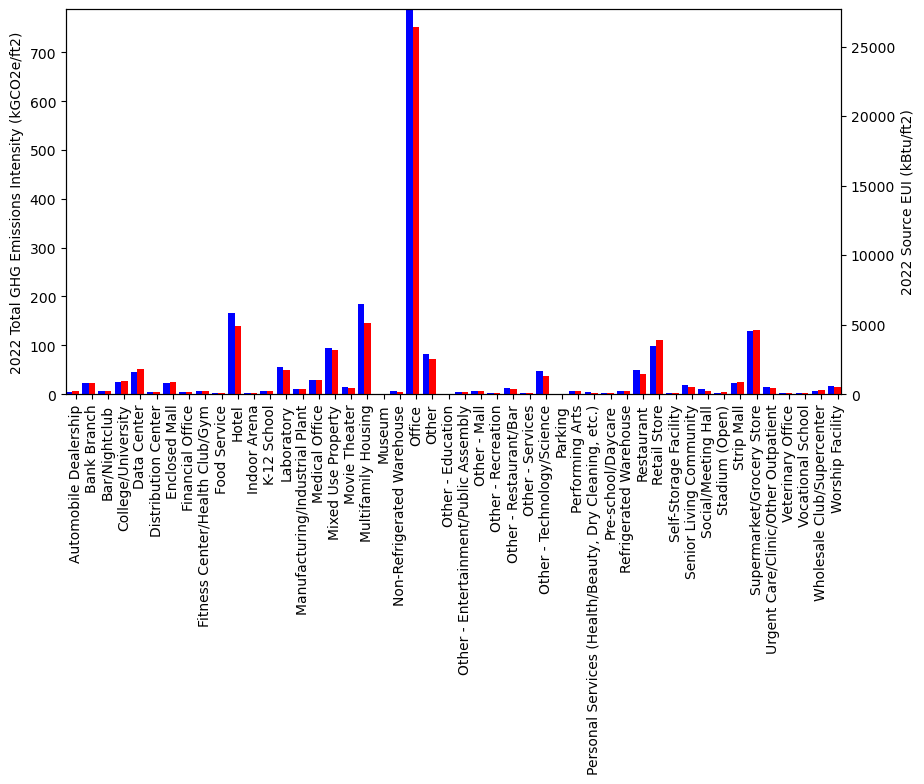

In [85]:
viz1 = clean_results_df.sort_values('Property Subcategory')
x = viz1['Property Subcategory'].unique()
x1 = np.arange(0,len(x),1)

y1 =viz1.groupby('Property Subcategory')['2022 Total GHG Emissions Intensity (kGCO2e/ft2)'].sum()
y2 = viz1.groupby('Property Subcategory')['2022 Source EUI (kBtu/ft2)'].sum()

fig=plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111) 
ax2 = ax.twinx()
w = 0.4
ax.bar(x1-w,y1,width = w,color="b", align="center")
ax2.bar(x,y2,width = w,color="r", align="center")

ax.set_ylabel('2022 Total GHG Emissions Intensity (kGCO2e/ft2)')
ax2.set_ylabel('2022 Source EUI (kBtu/ft2)')
ax.set_xticklabels(x, rotation= "vertical")
ax.autoscale(tight=True)
plt.show()

Question # 2: For commercial buildings, check if there is a relationship between year built and greenhouse gas emission intensity, as well as year built and source energy use intensity in 2022
Need to create two line graphs
X-Axis (buckets for year built), Y-Axis (Greenhouse gas emission intensity 2022)
X-Axis (buckets for year built), Y-Axis (Source energy use intensity 2022)

Question #3: Has the greenhouse gas emission intensity for commercial and residential buildings decreased since 2018?
Need to create two line graphs
X-Axis (years, 2018-2022), Y-Axis (take average of Greenhouse gas emission intensity each year, commercial buildings)
X-Axis (years, 2018-2022), Y-Axis (take average of Greenhouse gas emission intensity each year, residential buildings)

Question #4: Is there a correlation between energy use and building floor area?
Need to create a bar graph
X-Axis (property type), Y-Axis (correlation value from correlation function between energy use and floor area)


In [89]:
x_val = viz1['2022 Source EUI (kBtu/ft2)']
y_val = viz1['Floor Area']
corr = st.pearsonr[x_val,y_val]

TypeError: 'function' object is not subscriptable